# Install dependencies

[yamlu](https://github.com/bernhardschaefer/yamlu) stands for "yet another machine learning utility library".
It's a small library that I developed that features a basic COCO parser and functionality to visualize images and their annotations.

In [1]:
%pip install yamlu

Note: you may need to restart the kernel to use updated packages.


# Parse COCO datasets and visualize annotate images

In [4]:
import random
from pathlib import Path

from yamlu import ls
from yamlu.coco_read import CocoReader

datasets_root = Path("./datasets/")
ls(datasets_root)

[PosixPath('datasets/fa'),
 PosixPath('datasets/fca'),
 PosixPath('datasets/fcb'),
 PosixPath('datasets/fcb_scan')]

## FC_A

FC_A (aka [OHFCD](http://tc11.cvc.uab.es/datasets/OHFCD_1)) is an online flowchart dataset.

In [6]:
fca_reader = CocoReader(datasets_root / "fca")
ann_imgs = fca_reader.parse_split("train")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 248/248 [00:01<00:00, 175.61it/s]


yamlu visualizes not just bounding boxes, but also the arrow keypoints and the source and target shape that each arrow connects.
The red arrow follows the path `(src shape center, tail arrow keypoint, head arrow keypoint, tgt shape center)`.

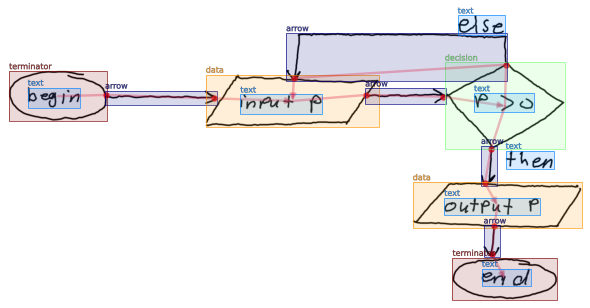

In [10]:
ai = random.choice(ann_imgs)
ai.plot(figsize=(8,8), font_size_scale=1., alpha_kp=0.7)

## FA

The [finite automata dataset](https://cmp.felk.cvut.cz/~breslmar/finite_automata/) by Bresler et al. 

In [12]:
fa_reader = CocoReader(datasets_root / "fa")
ann_imgs = fa_reader.parse_split("train")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 173.31it/s]


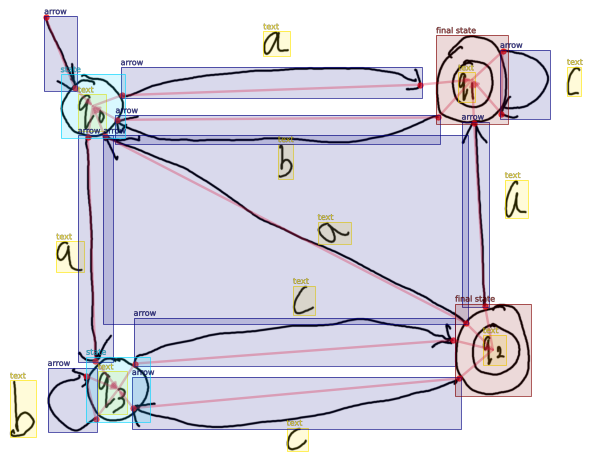

In [13]:
ai = random.choice(ann_imgs)
ai.plot(figsize=(8,8), font_size_scale=1., alpha_kp=0.7)

## FCB_Scan

The [FC Database - Off-line Extension](https://cmp.felk.cvut.cz/~breslmar/flowcharts_offline/index.html) by Bresler et al.

In [14]:
fcb_scan_reader = CocoReader(datasets_root / "fcb_scan")
ann_imgs = fcb_scan_reader.parse_split("train")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:09<00:00, 29.17it/s]


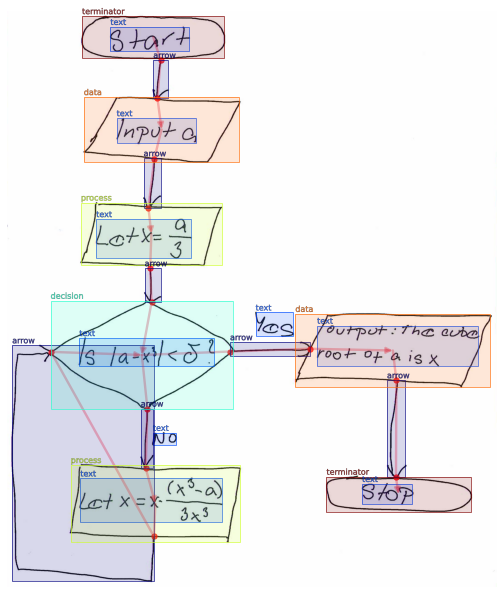

In [15]:
ai = random.choice(ann_imgs)
ai.plot(figsize=(8,8), font_size_scale=1., alpha_kp=0.7)